In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read data
df = pd.read_csv("Position_Salaries.csv")
print("Data imported")

Data imported


In [4]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
X = df.iloc[:,1:2].values
X.shape

(10, 1)

In [8]:
print('X\n',X)

X
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [9]:
y = df.iloc[:,-1].values
y.shape

(10,)

In [10]:
print('y\n',y)

y
 [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [11]:
#No need for Train_Test Split

In [13]:
#Fitting RF regr on X & y 
from sklearn.ensemble import RandomForestRegressor
rfregr = RandomForestRegressor(n_estimators=10, random_state=0)
rfregr.fit(X,y)

#n_estimators=10 No. of trees in RF

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
y_pred = rfregr.predict(X)
y_pred

array([ 46000.,  49000.,  59000.,  74000., 101000., 136000., 210000.,
       305000., 470000., 850000.])

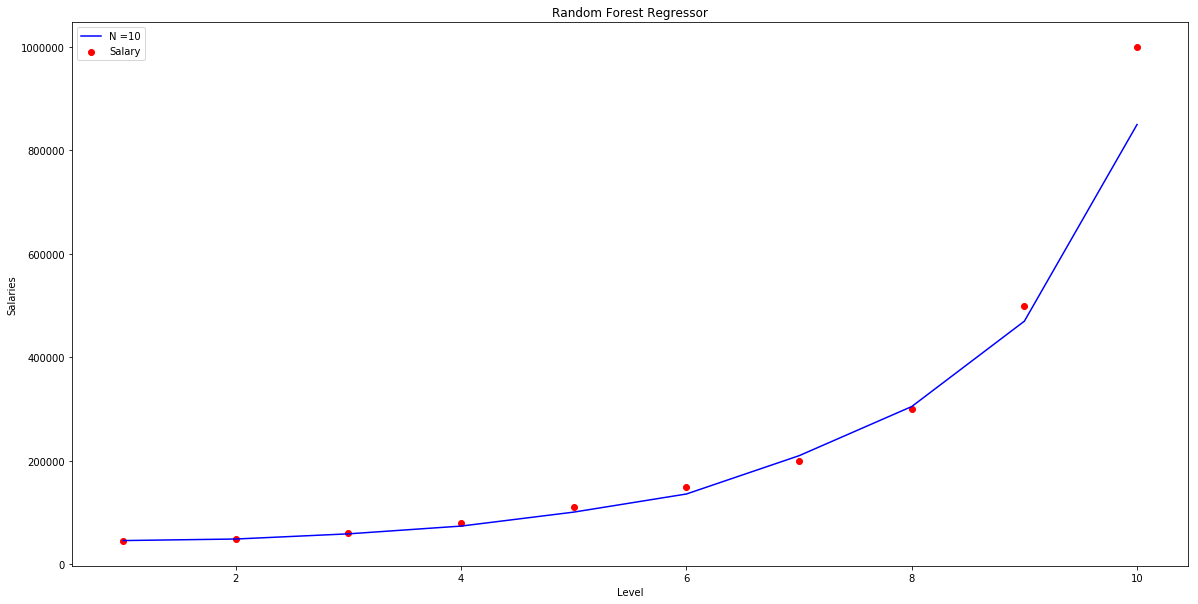

In [17]:
plt.figure(figsize = (20,10))
plt.scatter(X,y, c = 'r',label = 'Salary')
plt.plot(X,y_pred, c = 'b', label = 'N =10')
plt.title("Random Forest Regressor")
plt.xlabel("Level")
plt.ylabel("Salaries")
plt.legend()
plt.show()

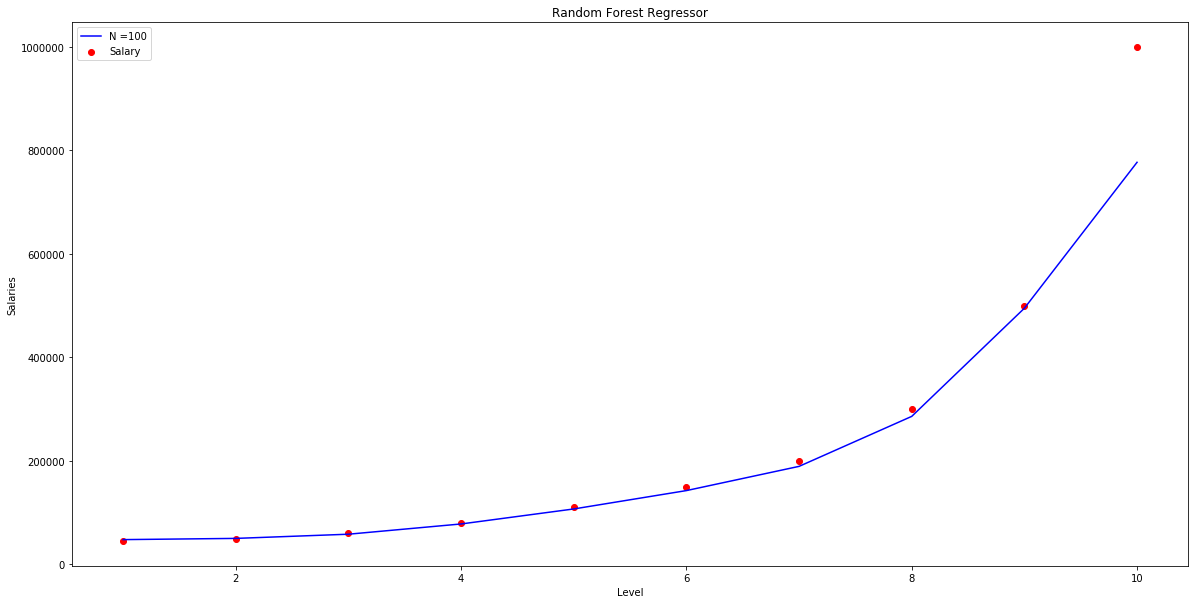

In [18]:
rfregr = RandomForestRegressor(n_estimators=100, random_state=0)
rfregr.fit(X,y)
y_pred = rfregr.predict(X)

plt.figure(figsize = (20,10))
plt.scatter(X,y, c = 'r',label = 'Salary')
plt.plot(X,y_pred, c = 'b', label = 'N =100')
plt.title("Random Forest Regressor")
plt.xlabel("Level")
plt.ylabel("Salaries")
plt.legend()
plt.show()

In [23]:
min(X)

array([1], dtype=int64)

In [24]:
#Visualising RF results with high resolution data

X_grid = np.arange(np.min(X), np.max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
X_grid.shape

(900, 1)

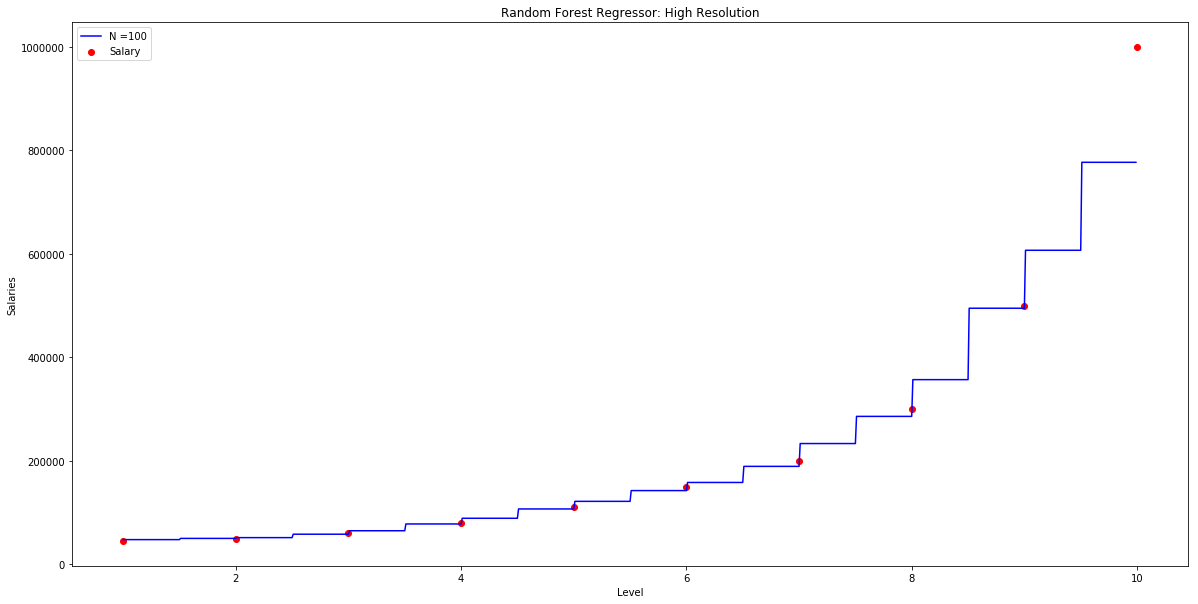

In [28]:
y_pred = rfregr.predict(X_grid)

plt.figure(figsize = (20,10))
#plt.scatter(X_grid,y, c = 'r',label = 'Salary') 
#ValueError: x and y must be the same size

plt.scatter(X,y, c = 'r',label = 'Salary') 
plt.plot(X_grid,y_pred, c = 'b', label = 'N =100')
plt.title("Random Forest Regressor: High Resolution")
plt.xlabel("Level")
plt.ylabel("Salaries")
plt.legend()
plt.show()